<a href="https://colab.research.google.com/github/OMEAkin/ML_with_TF_Opencampus_SH/blob/main/week_3/Wk3C__CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
Dataset at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/

Goal: implement random undersampling, perform the split into training, validation and test data. Train a very simple neural network. Save the bank at least 1.000.000 Euros!


# Structure:
1. Understanding data (EDA)
2. Preprocessing <br>
   a) Scaling and Distributing <br>
   b) Undersampling (TODO) <br>
   c) Split in Train/Val/Test (TODO) <br>
3. Baseline and Model Selection (TODO)
4. Model Training (TODO)
5. Evaluation of the Model
6. Leave open: Deployment, Scalability and Maintenence

#### LOAD PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings  # Warnings module

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

# Filter out Matplotlib deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#### EXPLORATORY DATA ANALYSIS

In [ ]:
#import/upload data
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
# load dataset
df = pd.read_csv('creditcard.csv')

# reorder the columns for the presentation
new_column_order = ['Class', 'Time', 'Amount'] + [f'V{i}' for i in range(1, 27)]
df = df[new_column_order]

# quick look at the data
df.head()

,Class,Time,Amount,V1,V2,V3,V4,V5,V6,V7,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
0,0,0.0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115
1,0,0.0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895
2,0,1.0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097
3,0,1.0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929
4,0,2.0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292


In [ ]:
# basic statistics
df.describe()

,Class,Time,Amount,V1,V2,V3,V4,V5,V6,V7,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,94813.859575,88.349619,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,...,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15
std,0.041527,47488.145955,250.120109,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00
25%,0.000000,54201.500000,5.600000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01
50%,0.000000,84692.000000,22.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02
75%,0.000000,139320.500000,77.165000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01
max,1.000000,172792.000000,25691.160000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00


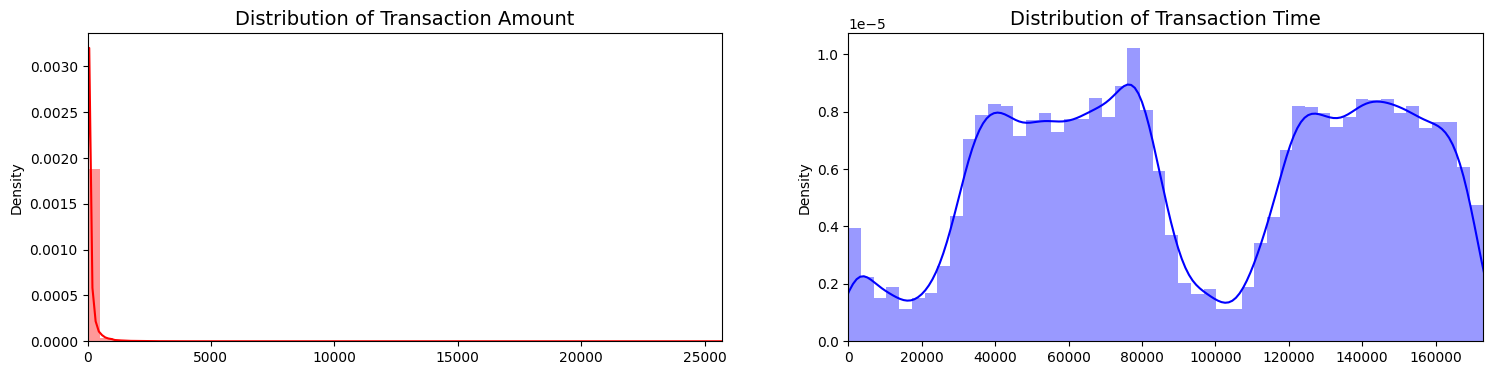

In [ ]:
# Create a figure with two subplots (1 row, 2 columns) and set the figure size
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Extract the 'Amount' and 'Time' columns from the DataFrame 'df' and store them in arrays
amount_val = df['Amount'].values
time_val = df['Time'].values

# Create a distribution plot (histogram with a fitted kernel density estimate) for the 'Amount' column
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)  # Set the title for the first subplot
ax[0].set_xlim([min(amount_val), max(amount_val)])  # Set the x-axis limits based on the minimum and maximum 'Amount' values

# Create a distribution plot for the 'Time' column
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)  # Set the title for the second subplot
ax[1].set_xlim([min(time_val), max(time_val)])  # Set the x-axis limits based on the minimum and maximum 'Time' values

# Display the plots
plt.show()

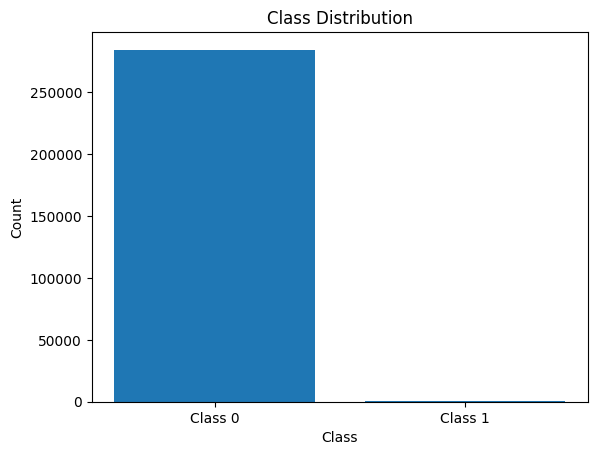

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
There are no missing values in the dataset


In [ ]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, labels=['Class 0', 'Class 1'])
plt.title('Class Distribution')
plt.show()

# Compute distribution of the dataset
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

# Check for null values
if(df.isnull().sum().max() == 0):
    print("There are no missing values in the dataset")

#### **Comments on dataset**:
* Features seem to be missing headings. Kaggle dataset description states that V1 to V28 are a result of Principal-Component Analysis (PCA).
<br> 

**PCA:** Procedure for structuring extensive datasets. By utilizing eigenvectors, the numerous statistical variables are approximated by as few linear combinations as possible. <br>

**Issues:** features visualization of the features is practically "impossible." If the dataset is good and the procedure is applied well, then the dataset is reduced to the essential, however, a healthy dose of skepticism might be needed regarding this. If the information one is looking for is not in the data, no amount of training will make progress. <br>
-   The classes are extremely poorly distributed! Some form of sampling for the model to learn! <br>

- There are no missing values. Rare in real-life scenarios. <br>

#### **Tasks**:
##### *"Time" & "amount" need to be scaled*
- All features should have the same range, statistical procedure available (use Robust Scaling)
##### *Class balancing technique is needed*
a) **Undersampling:** provoking an equal distribution - we take all our fraud examples and an equal number of non-fraud examples <br>
b) **Random Undersampling:** the same - but we randomly select values from the large class
##### *We should examine the correlation of individual values:*
a) Correlation Matrix


#### Data Scaling

In [ ]:
# Scaling the data to change all values t the same Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# Create a copy of the 'Amount' values
amount_values_copy = df['Amount'].values.copy()

# scale the dataframe and remove the unscaled columns
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

#### TODO: Random undersampling!

In [ ]:
#check the counts for both classes
C1 = df['Class' == 0].value_counts()
C2 = df['Class' == 1].value_counts()

print(C1)
print(C2)

KeyError: ignored

#### Sanity Checks and Correlation Matrix:

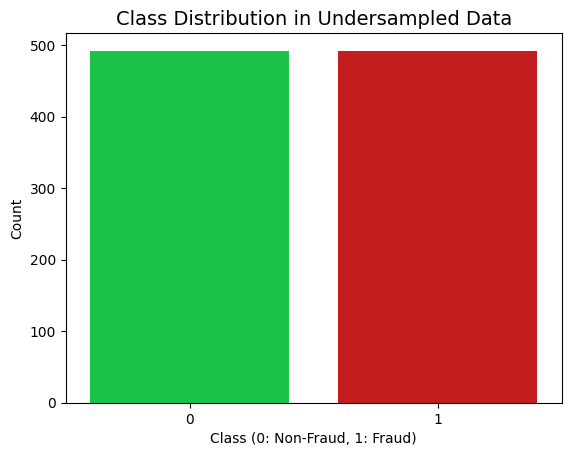

In [ ]:
# Create a countplot to visualize the class distribution
sns.countplot(x='Class', data=undersampled_data, palette=["#01DF3A", "#DF0101"])
plt.title('Class Distribution in Undersampled Data', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

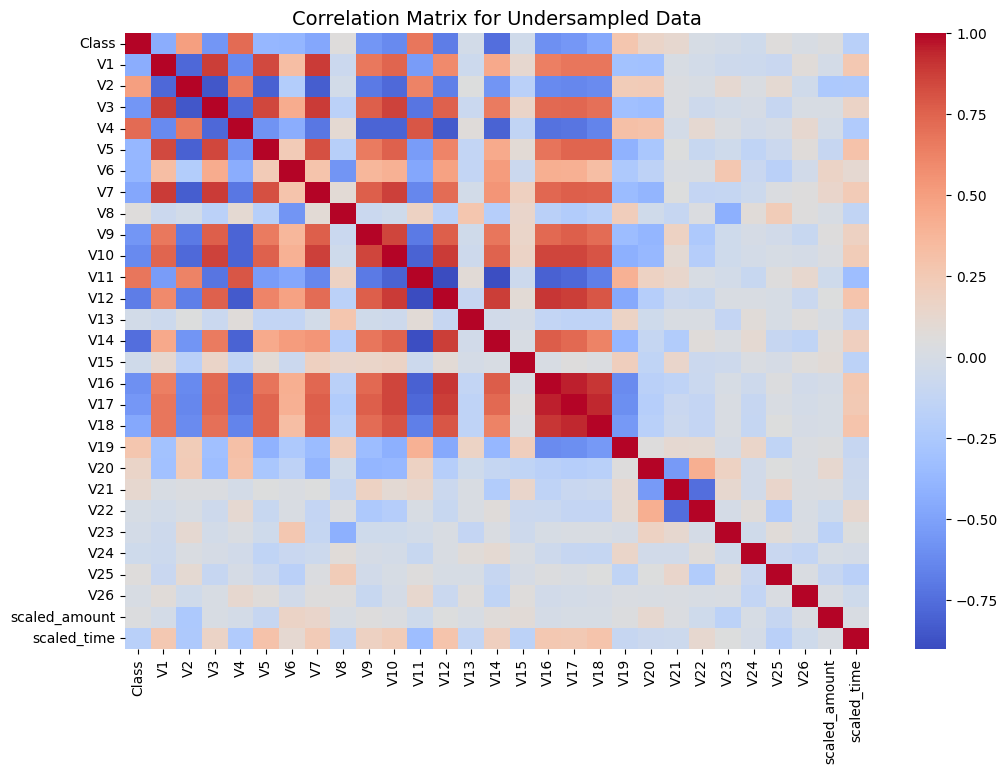

In [ ]:
# Compute the correlation matrix
correlation_matrix = undersampled_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix for Undersampled Data', fontsize=14)
plt.show()

#### Data Splitting

In [ ]:
# Split the data into training, validation, and test sets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

#TODO Split data into training, validation and test dataset
# Names should be train_df , val_df and test_df

In [ ]:
# Using scikit learn

### Baseline and Model Definition

In [ ]:
# Extract features and target variable
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

X_val = val_df.drop('Class', axis=1).values
y_val = val_df['Class'].values

X_test = test_df.drop('Class', axis=1).values
y_test = test_df['Class'].values

#### TODO Train a simple neural network

In [ ]:
# Define your Tensorflow model here:
# model should be called "model" so the rest of the code works

#### Testing the model against the original dataset

8901/8901 [==============================] - 9s 965us/step
Total money of all transactions: €25162590.01
Estimated processing cost of the bank: €1673241.12
New estimated processing cost: €40995.75
Money lost because of fraud: €60127.97
Money lost with the detection system in place: €5524.09


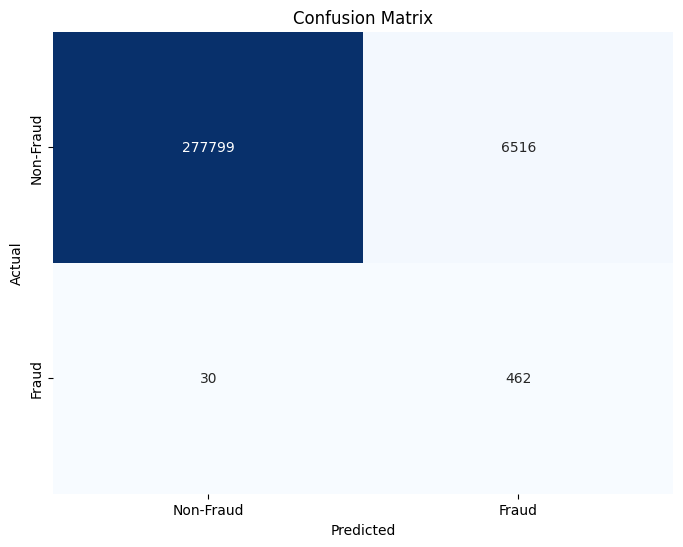

In [ ]:
from sklearn.metrics import confusion_matrix

X_original = df.drop('Class', axis=1).values
y_original = df['Class'].values

# Make predictions on the original dataset
y_pred = model.predict(X_original)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probability scores to binary predictions

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_original, y_pred_binary)

# add the copied original values back in
# Get the amounts for each transaction
df['original_amount'] = amount_values_copy
amounts = df['original_amount'].values

# Get the counts of true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

total_occurences = tn + fp + fn + tp

# Initialize sums for each class
tn_amount = 0
fp_amount = 0
fn_amount = 0
tp_amount = 0

# Calculate the sum of amounts for each class in the confusion matrix
for i in range(len(y_original)):
    if y_original[i] == 0 and y_pred_binary[i] == 0:
        tn_amount += amounts[i]
    elif y_original[i] == 0 and y_pred_binary[i] == 1:
        fp_amount += amounts[i]
    elif y_original[i] == 1 and y_pred_binary[i] == 0:
        fn_amount += amounts[i]
    elif y_original[i] == 1 and y_pred_binary[i] == 1:
        tp_amount += amounts[i]

# Create a beautiful plot for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print the sums of amounts for each class
total_amount = tn_amount + fp_amount + fn_amount + tp_amount
# Hourly rate of a bank clerk checking fraud
# https://www.gehalt.de/beruf/senior-consultant-zahlungsverkehr -> Salary of a person working in Money processing (3.759€ per Month)
# Hourly rate approx: 23,50€
# Assumption: one case takes 15 Minute to process (before linearization)

# total processing cost the bank will have to check all cases
total_processing_cost = (15 / 60) * 23.50 * total_occurences

# Cost it takes to compute false negatives and false positives aka. new processing cost
new_processing_cost = (15 / 60) * 23.50 * (tp + fp)

# the amount of fraud lost:
fraud_amount = fn_amount + tp_amount
# the amount of fraud detected:
fraud_detected_amount = tp_amount
# the amount of fraud loss after detection is in place
fraud_loss_with_detection = fn_amount

# Define Euro symbol
euro_symbol = "€"
# Format and print the values
print(f"Total money of all transactions: {euro_symbol}{total_amount:.2f}")
print(f"Estimated processing cost of the bank: {euro_symbol}{total_processing_cost:.2f}")
print(f"New estimated processing cost: {euro_symbol}{new_processing_cost:.2f}")
print(f"Money lost because of fraud: {euro_symbol}{fraud_amount:.2f}")
print(f"Money lost with the detection system in place: {euro_symbol}{fraud_loss_with_detection:.2f}")

# drop the amount column again, so that we can execute this cell block again without error:
df.drop(['original_amount'], axis=1, inplace=True)
plt.show()